In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re
import string
from wordcloud import WordCloud, STOPWORDS

sns.set_palette('rainbow',8, 0.45)

In [8]:
files_path = 'Files'

In [9]:
critics_reviews = pd.read_csv(os.path.join(files_path, "rt_reviews_lemma_english.csv"), index_col=0)
users_reviews = pd.read_csv(os.path.join(files_path, "user_reviews_mother_classified.csv"), index_col=0)

In [10]:
users_reviews.head()

,rotten_tomatoes_link,review_content,lang_idf,prepared_review_content,class_pred
0,m/mother_2017,"An intense, gorgeous and brilliant allegory. I...",en,"intense , gorgeous brilliant allegory . little...",Fresh
1,m/mother_2017,too literal. lacks any kind of nuance. lacks c...,en,literal . lack kind nuance . lack creativity e...,Rotten
2,m/mother_2017,"As though as it is to watch and understand, it...",en,"watch understand , brilliantly direct think .",Fresh
3,m/mother_2017,This movie had me pissed off for 2 hours. Thou...,en,movie piss 2 hour . thought ending massively g...,Rotten
4,m/mother_2017,"Mother! Is frustrating, stupidly surrealistic ...",en,"mother ! frustrating , stupidly surrealistic d...",Fresh


In [11]:
critics_reviews.loc[critics_reviews['rotten_tomatoes_link'] == 'm/mother_2017'].head(3)

,rotten_tomatoes_link,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content,review_year,lang_idf,prepared_review_content
589275,m/mother_2017,Simon Miraudo,False,Student Edge,Fresh,3.5/5,2017-09-18,"When absurdity takes over in the final third, ...",2017,en,"absurdity take final , mother ! wildly fun cer..."
589448,m/mother_2017,Damond Fudge,False,"KCCI (Des Moines, IA)",Fresh,NaN,2020-07-03,"Mother! is a dense, twisting fever dream spawn...",2020,en,"Mother ! dense , twist fever dream spawn sort ..."
589398,m/mother_2017,Johnny Gayzmonic,False,Fanboys of the Universe,Fresh,7/10,2018-10-30,mother! is a low-burn that goes from smolderin...,2018,en,"mother ! low - burn go smolder scald , blast -..."


## Nuvens de palavras dos reviews dos críticos

### Geral: rótulos Rotten e Fresh

In [31]:
critics_text = critics_reviews.loc[critics_reviews['rotten_tomatoes_link'] == 'm/mother_2017', 'prepared_review_content']
critics_text = ' '.join(critics_text).lower()
critics_text = re.sub("\'\w+", '', critics_text)
critics_text = re.sub('[%s]' % re.escape(string.punctuation), ' ', critics_text)

In [53]:
critics_stopwords = ['aronofsky', 'movie', 'jennifer','lawrence', 'darren', 'mother', 'film', 'leave','like','review','spanish','want','see','make','year','come']

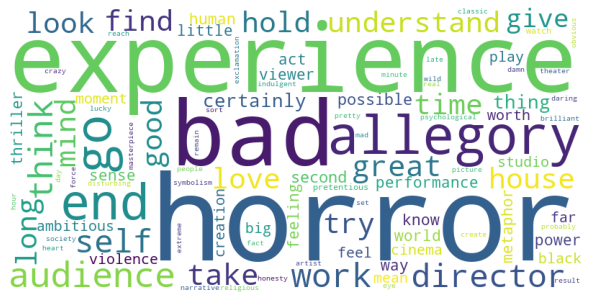

In [48]:
wordcloud = WordCloud(width = 800, height = 400,
                background_color ='white',
                stopwords = critics_stopwords,
                 min_font_size = 10).generate(critics_text)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

### Rótulos Rotten

In [49]:
critics_text_r = critics_reviews.loc[(critics_reviews['rotten_tomatoes_link'] == 'm/mother_2017') & (critics_reviews['review_type'] == 'Rotten'), 'prepared_review_content']
critics_text_r = ' '.join(critics_text_r).lower()
critics_text_r = re.sub("\'\w+", '', critics_text_r)
critics_text_r = re.sub('[%s]' % re.escape(string.punctuation), ' ', critics_text_r)

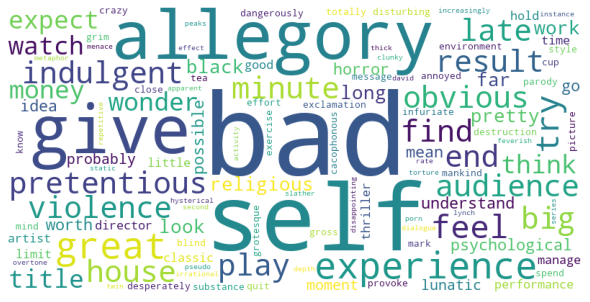

In [55]:
wordcloud = WordCloud(width = 800, height = 400,
                background_color ='white',
                stopwords = critics_stopwords,
                 min_font_size = 10).generate(critics_text_r)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

### Rótulos Fresh

In [56]:
critics_text_f = critics_reviews.loc[(critics_reviews['rotten_tomatoes_link'] == 'm/mother_2017') & (critics_reviews['review_type'] == 'Fresh'), 'prepared_review_content']
critics_text_f = ' '.join(critics_text_f).lower()
critics_text_f = re.sub("\'\w+", '', critics_text_f)
critics_text_f = re.sub('[%s]' % re.escape(string.punctuation), ' ', critics_text_f)

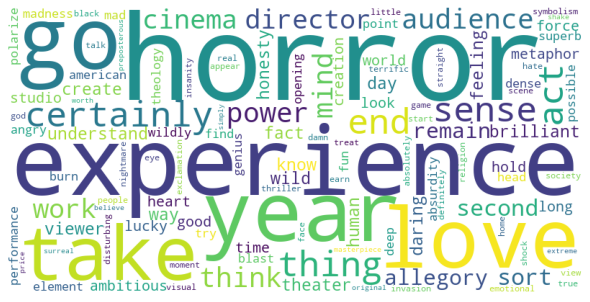

In [58]:
wordcloud = WordCloud(width = 800, height = 400,
                background_color ='white',
                stopwords = ['aronofsky', 'movie', 'jennifer','lawrence', 'darren', 'mother', 'film', 'leave','like','review','spanish','want','come','make','see'],
                 min_font_size = 10).generate(critics_text_f)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

## Nuvens de palavras dos reviews dos usuários

### Geral: rótulos Rotten e Fresh

In [7]:
text = users_reviews.loc[users_reviews['rotten_tomatoes_link'] == 'm/mother_2017', 'prepared_review_content']
text = ' '.join(text).lower()
text = re.sub("\'\w+", '', text)
text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)

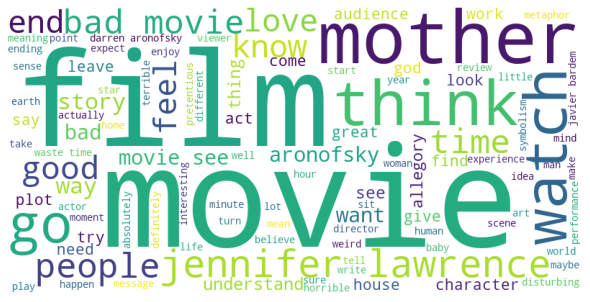

In [60]:
wordcloud = WordCloud(width = 800, height = 400,
                background_color ='white',
                #stopwords = stopwords,
                 min_font_size = 10).generate(text)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

### Rótulos Rotten

In [8]:
users_text_r = users_reviews.loc[(users_reviews['rotten_tomatoes_link'] == 'm/mother_2017') & (users_reviews['class_pred'] == 'Rotten'), 'prepared_review_content']
users_text_r = ' '.join(users_text_r).lower()
users_text_r = re.sub("\'\w+", '', users_text_r)
users_text_r = re.sub('[%s]' % re.escape(string.punctuation), ' ', users_text_r)

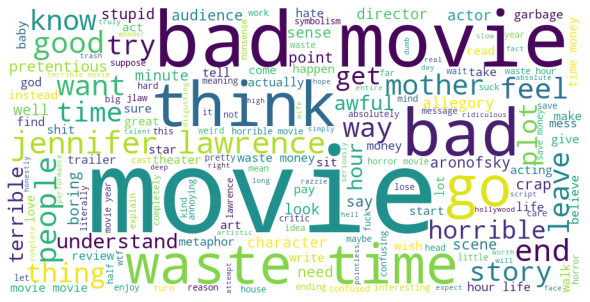

In [24]:
wordcloud = WordCloud(width = 900, height = 450,
                background_color ='white',
                stopwords = ['film','watch','like', 'see'],
                 min_font_size = 10).generate(users_text_r)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

### Rótulos Fresh

In [17]:
users_text_f = users_reviews.loc[(users_reviews['rotten_tomatoes_link'] == 'm/mother_2017') & (users_reviews['class_pred'] == 'Fresh'), 'prepared_review_content']
users_text_f = ' '.join(users_text_f).lower()
users_text_f = re.sub("\'\w+", '', users_text_f)
users_text_f = re.sub('[%s]' % re.escape(string.punctuation), ' ', users_text_f)

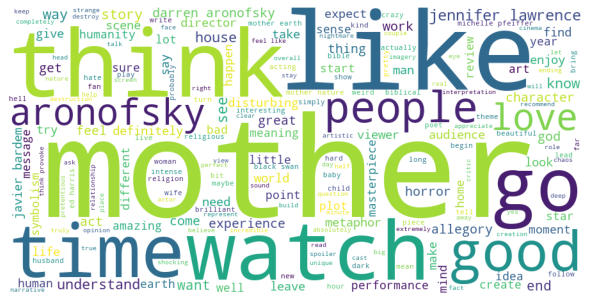

In [25]:
wordcloud = WordCloud(width = 900, height = 450,
                background_color ='white',
                stopwords = ['film','movie'],
                 min_font_size = 10).generate(users_text_f)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()